In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Input, Activation
from keras.datasets import boston_housing

import tensorflow as tf
import matplotlib.pyplot as plt

2025-05-22 13:05:26.261992: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-22 13:05:26.284589: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
SEED_VALUE = 42

# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

## Load Boston Housing Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape)

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
(404, 13)


In [5]:
print("Input features: ",X_train[0])
print("\n")
print("Output target: ", y_train[0])

Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


## Extract features from the Dataset

In [12]:
boston_features = {
    "Average Number of Rooms": 5,
}

X_train_1d = X_train[:, boston_features["Average Number of Rooms"]]
print(X_train_1d.shape)

X_test_1d = X_test[:, boston_features["Average Number of Rooms"]]

(404,)


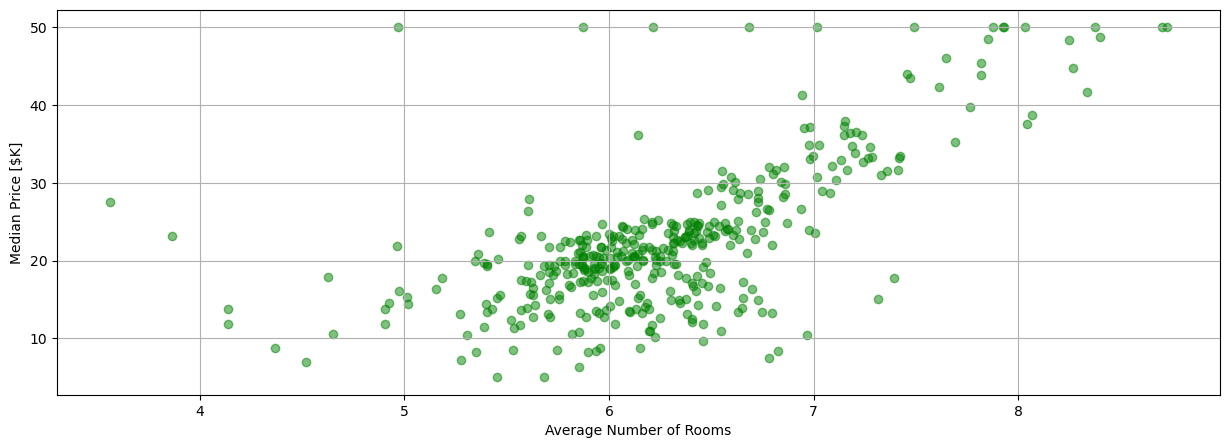

In [14]:
plt.figure(figsize=(15,5))

plt.xlabel("Average Number of Rooms")
plt.ylabel("Median Price [$K]")
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color="green", alpha=0.5)

## Define a Keras model

In [15]:
model = Sequential()

# Define the model consisting of single neuron.
model.add(Dense(units=1, input_shape=(1,)))

# Display a summary of the model architecture.
model.summary()

/home/rajat/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [16]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005), loss="mse")

## Train the model

In [17]:
history = model.fit(
    X_train_1d,
    y_train,
    batch_size=16,
    epochs=101,
    validation_split=0.3,
)

Epoch 1/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 366.6315 - val_loss: 463.5130
Epoch 2/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 338.6313 - val_loss: 438.0255
Epoch 3/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 317.2114 - val_loss: 414.1870
Epoch 4/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 297.0711 - val_loss: 391.3041
Epoch 5/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 277.8133 - val_loss: 369.2802
Epoch 6/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 259.3811 - val_loss: 348.1002
Epoch 7/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 241.7649 - val_loss: 327.7608
Epoch 8/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 220.6834 - val_loss: 308.2610
Epoch 9/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 208.9697 - val_loss: 289.5995
Epoch 10/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 193.7868 - val_loss: 271.7752
Epoch 11/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 179.4109 - val_loss: 254.7868
Epoch 12/101
18/18 

## Plot the training Results

In [22]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label="Validation Loss")
    plt.xlim([0,100]),
    plt.ylim([0,300]),
    plt.xlabel("Epoch"),
    plt.ylabel("Loss"),
    plt.legend(),
    plt.grid(True)

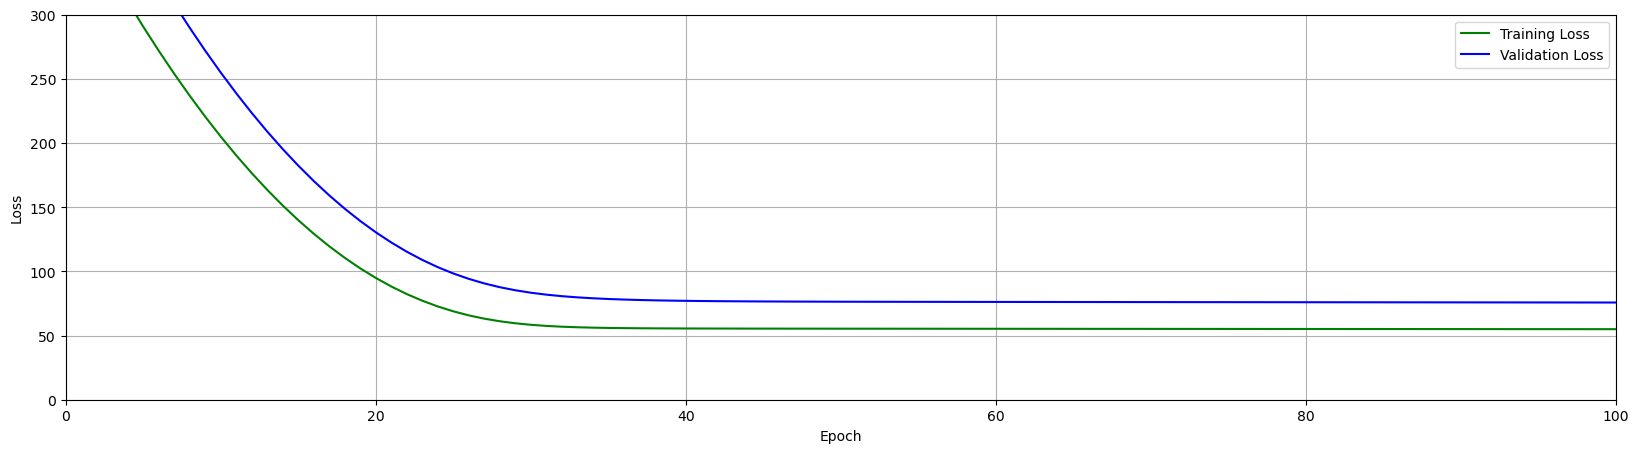

In [23]:
plot_loss(history)

## Make predictions using the model

In [26]:
# Predictr the median price of the home with [3, 4, 5, 6, 7] rooms.
x = np.array([3, 4, 5, 6, 7])
y_pred = model.predict(x)
for idx in range(len(x)):
    predicted_price = y_pred[idx].item()
    print(f"Printed price of a home with {x[idx]} rooms: {int(predicted_price * 10) / 10}K")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Printed price of a home with 3 rooms: 11.6K
Printed price of a home with 4 rooms: 14.8K
Printed price of a home with 5 rooms: 18.1K
Printed price of a home with 6 rooms: 21.3K
Printed price of a home with 7 rooms: 24.5K


## Plot the model and the Data

In [28]:
# Generate feature data that spans the range of interest for the independent variable
x= np.linspace(3, 9, 10)

# Use the model to predict the dependent variable.
y= model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [31]:
def plot_data(x_data, y_data, x, y, title=None):

    plt. figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel("Average Number of rooms")
    plt.ylabel("Price [$K]")
    plt.title(title)
    plt.grid(True)
    plt.legend()

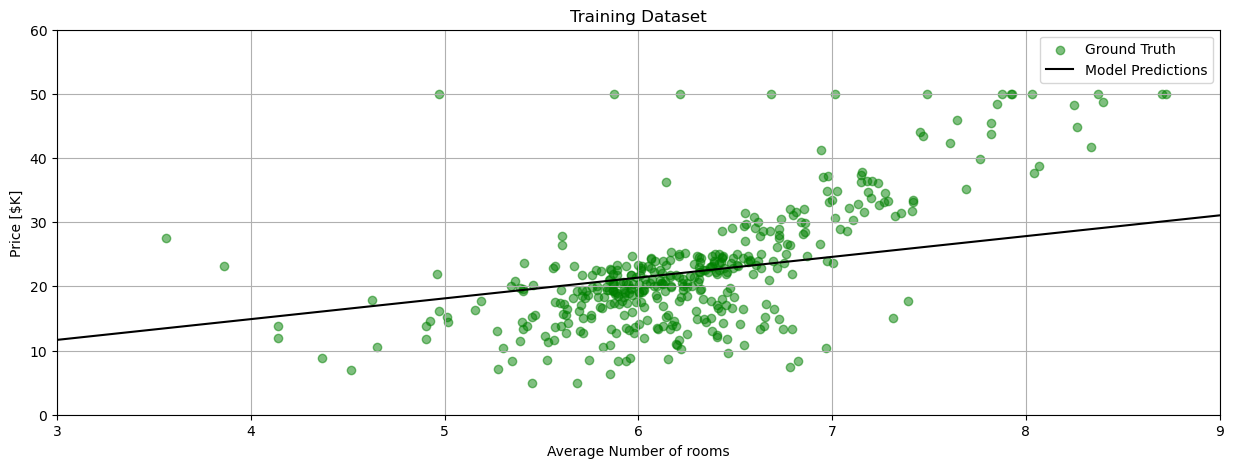

In [32]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

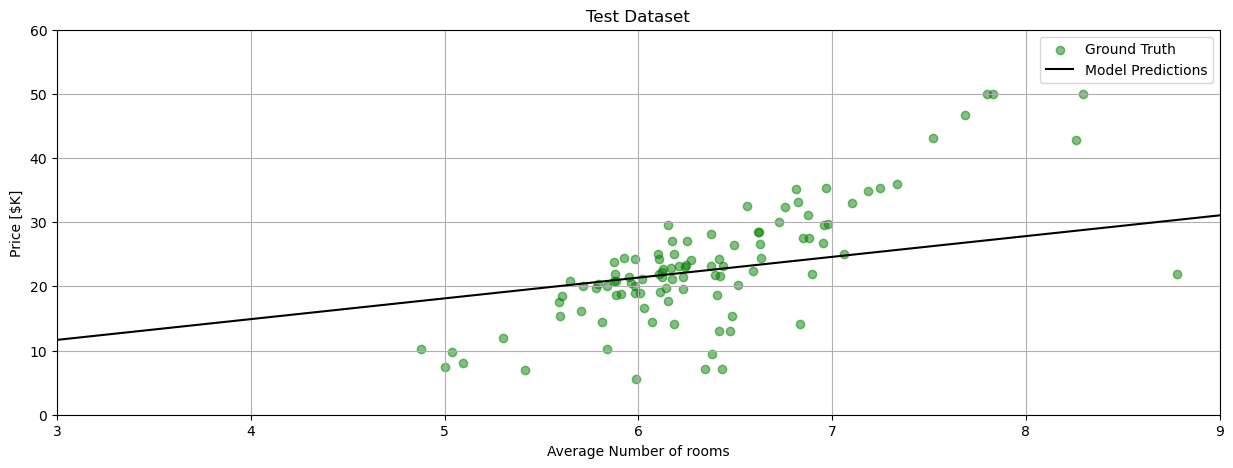

In [33]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')